In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Lokasi dataset di Google Drive
dataset_path = '/content/drive/MyDrive/dataset'


In [ ]:
#folder structure
!ls '/content/drive/MyDrive/dataset'

'daun sehat'  'daun terkena penyakit'


Kelas: daun sehat


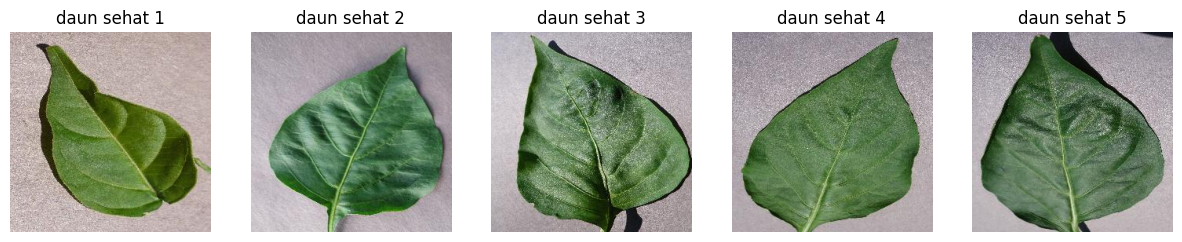

Kelas: daun terkena penyakit


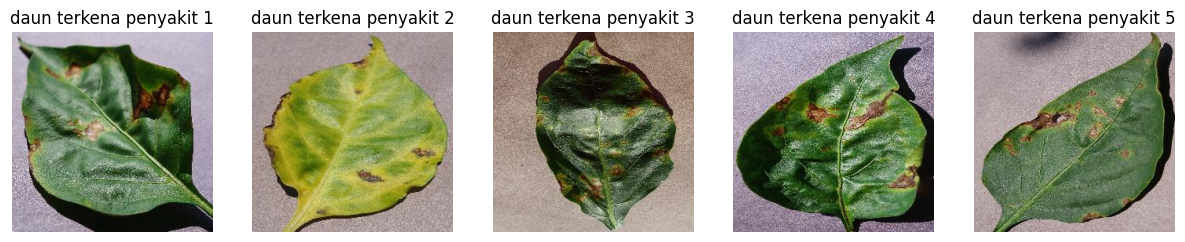

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Tentukan path direktori utama yang berisi folder per kelas
base_dir = "/content/drive/MyDrive/dataset"
n_images_per_class = 5  # Tentukan berapa banyak gambar per kelas yang ingin ditampilkan

# Dapatkan daftar nama folder di dalam direktori utama (misalnya nama kelas)
class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Loop untuk tiap kelas
for class_name in class_folders:
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)  # Daftar gambar di dalam folder kelas
    selected_images = images[:n_images_per_class]  # Pilih sejumlah gambar pertama

    print(f"Kelas: {class_name}")

    # Plot gambar-gambar dari kelas ini
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        # Tampilkan gambar di subplot
        plt.subplot(1, n_images_per_class, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name} {i+1}")

    plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#load everything into memory
x = []
y = []
class_names = []
parent_directory = '/content/drive/MyDrive/dataset'
for i,folder in enumerate(os.listdir(parent_directory)):
    print(i,folder)
    class_names.append(folder)
    folder_directory = os.path.join(parent_directory,folder)
    files = os.listdir(folder_directory)
    #will inspect only 1 image per folder
    for file in files:
        file_path = os.path.join(folder_directory,file)
        image = load_img(file_path,target_size=(224,224))
        image = img_to_array(image)/255.
        x.append(image)
        y.append(i)

x = np.array(x)
y = to_categorical(y)

#check the data shape
print(x.shape)
print(y.shape)
print(y[0])

x_train, _x, y_train, _y = train_test_split(x,y,test_size=0.2, stratify = y, random_state = 1)
x_valid,x_test, y_valid, y_test = train_test_split(_x,_y,test_size=0.4, stratify = _y, random_state = 1)

print("train data:",x_train.shape,y_train.shape)
print("validation data:",x_valid.shape,y_valid.shape)
print("test data:",x_test.shape,y_test.shape)


0 daun sehat
1 daun terkena penyakit
(2213, 224, 224, 3)
(2213, 2)
[1. 0.]
train data: (1770, 224, 224, 3) (1770, 2)
validation data: (265, 224, 224, 3) (265, 2)
test data: (178, 224, 224, 3) (178, 2)


In [ ]:
# Membuat ImageDataGenerator untuk data pelatihan dan validasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Membagi data 80% untuk training dan 20% untuk validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Ukuran gambar yang dibutuhkan oleh MobileNet
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1771 images belonging to 2 classes.
Found 442 images belonging to 2 classes.


In [ ]:
print("Training generator batch shape:", train_generator.image_shape)
print("Validation generator batch shape:", validation_generator.image_shape)


Training generator batch shape: (224, 224, 3)
Validation generator batch shape: (224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mendapatkan jumlah kelas dari data generator
num_classes = len(train_generator.class_indices)
print(f"Jumlah kelas: {num_classes}")

# Load MobileNet sebagai base model dengan Functional API
import tensorflow as tf
IMG_SHAPE = (224, 224, 3)

# Membuat model dasar (base model) dari pre-trained model MobileNet
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# Buat model menggunakan Functional API
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model
model.summary()

Jumlah kelas: 2
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,210 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7844 - loss: 0.4235
Epoch 1: val_loss improved from inf to 0.09997, saving model to DeteksiPenyakitTanaman.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.7861 - loss: 0.4208 - val_accuracy: 0.9457 - val_loss: 0.1000
Epoch 2/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9398 - loss: 0.1463
Epoch 2: val_loss improved from 0.09997 to 0.07732, saving model to DeteksiPenyakitTanaman.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9398 - loss: 0.1463 - val_accuracy: 0.9774 - val_loss: 0.0773
Epoch 3/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9555 - loss: 0.1088
Epoch 3: val_loss improved from 0.07732 to 0.04658, saving model to DeteksiPenyakitTanaman.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.9556 - loss: 0.1086 - val_accuracy: 0.9842 - val_loss: 0.0466
Epoch 4/250
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9650 - loss: 0.0752
Epoch 4: val_loss did not improve from 0.

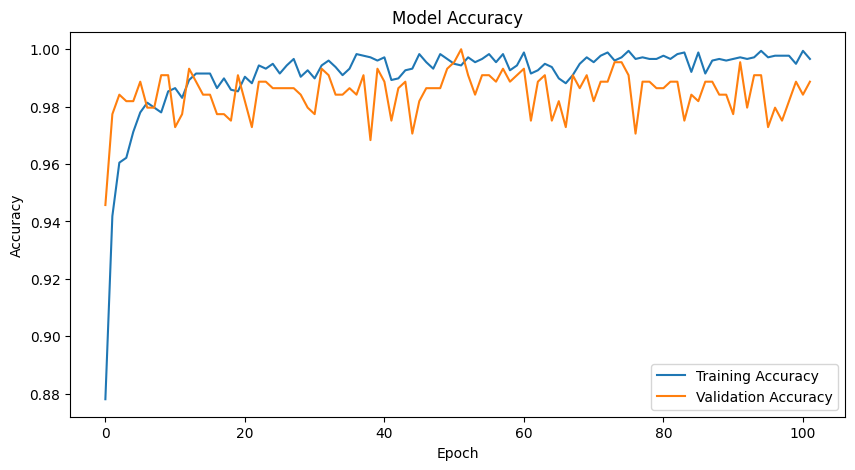

Training Accuracy: 99.66%
Validation Accuracy: 98.87%


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callback untuk menghentikan pelatihan ketika tidak ada perbaikan dalam 10 epoch pada metrik 'val_loss'
es = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='auto')

# Callback untuk menyimpan model dengan bobot terbaik selama pelatihan
ckpt = ModelCheckpoint(
    "DeteksiPenyakitTanaman.keras",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto'
)

# Melatih model
history = model.fit(
    train_generator,
    epochs=250,
    validation_data=validation_generator,
     callbacks=[es, ckpt]
)

# Plotting akurasi model
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Menampilkan nilai akurasi terakhir
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")

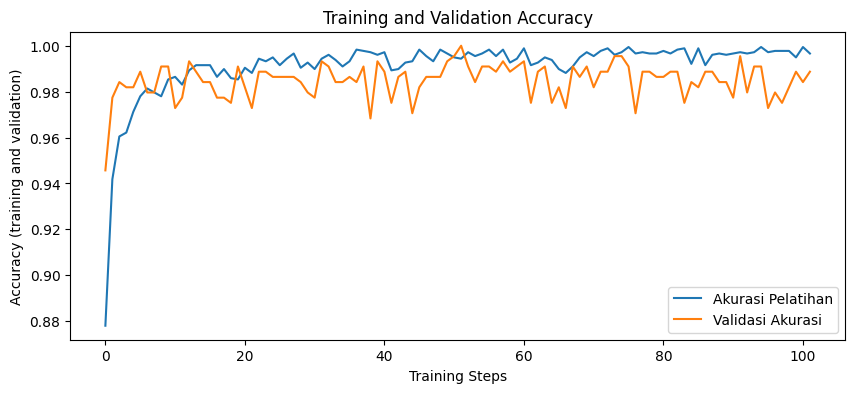

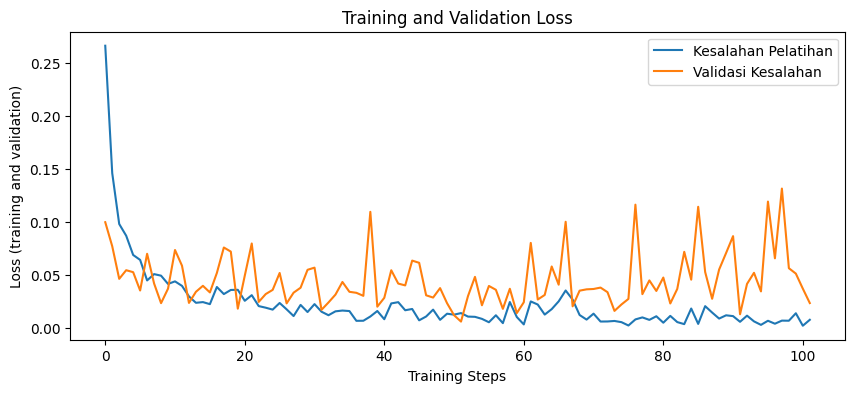

Training Accuracy: 99.66%
Validation Accuracy: 98.87%
Training Loss: 0.80%
Validation Loss: 2.37%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
plt.figure(figsize=(10, 4))
#plt.subplot(1, 5, 4)
plt.plot(history.history["accuracy"],label="Akurasi Pelatihan")
plt.plot(history.history["val_accuracy"],label="Validasi Akurasi")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.show()
plt.figure(figsize=(10, 4))
#plt.subplot(1, 3, 2)
plt.plot(history.history["loss"],label="Kesalahan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kesalahan")
plt.legend()
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

# Menampilkan nilai akurasi terakhir
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1] * 100
val_loss = history.history['val_loss'][-1] * 100
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Training Loss: {train_loss:.2f}%")
print(f"Validation Loss: {val_loss:.2f}%")

In [ ]:
#load the model weight file with lowest validation loss
model.load_weights("DeteksiPenyakitTanaman.keras")

In [ ]:
#check the model metrics
print(model.metrics_names)
#evaluate training data
print(model.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(model.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(model.evaluate(x= x_test, y = y_test))

['loss', 'compile_metrics']
56/56 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9921 - loss: 0.0198
[0.020210102200508118, 0.9909604787826538]
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9904 - loss: 0.0452
[0.04389964044094086, 0.99245285987854]
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9882 - loss: 0.0297
[0.016758205369114876, 0.9943820238113403]


In [ ]:
#draw a confusion matrix

#true label
y_true = np.argmax(y_test,axis=1)

#prediction label
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
[1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1]
[1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0
 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1]


Normalized confusion matrix
[[0.99 0.01]
 [0.   1.  ]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

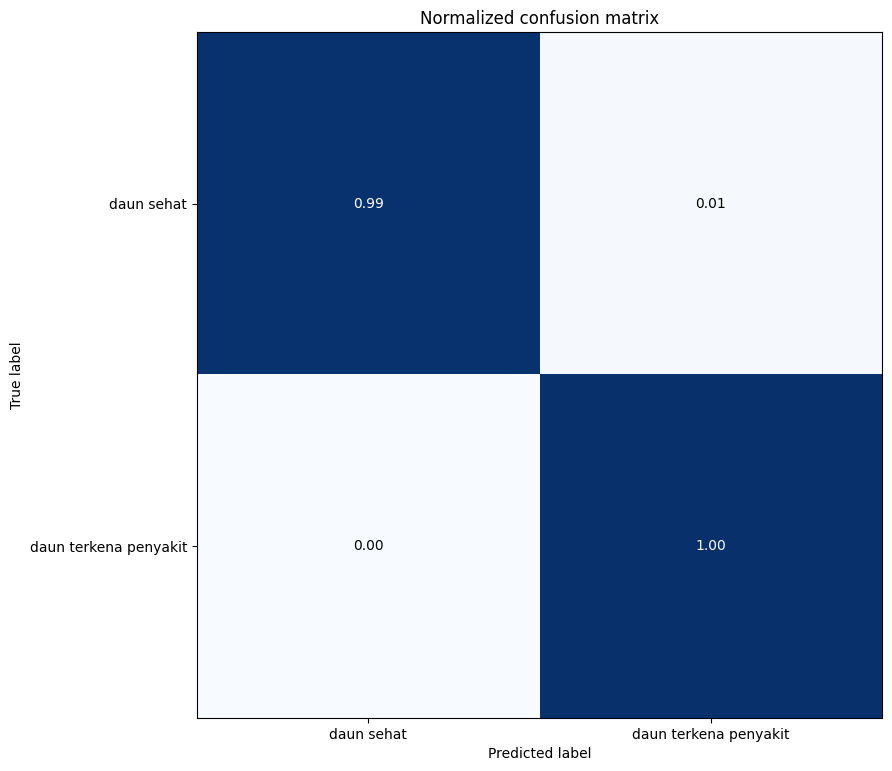

In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(9,9))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

**Prediksi**

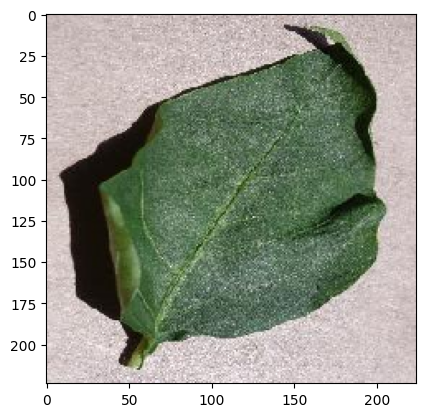

Gambar Yang Benar Adalah: 0 : daun sehat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
prediksi Value: [1.00e+00 2.15e-07]
prediksi gambar: 0 : daun sehat
Prediksi Benar


In [ ]:
n = 8 #do not exceed (number of test image - 1)

plt.imshow(x_test[n])
plt.show()

true_label = np.argmax(y_test,axis=1)[n]
print("Gambar Yang Benar Adalah:",true_label,":",class_names[true_label])
prediction = model.predict(x_test[n][np.newaxis,...])[0]
print("prediksi Value:",prediction)
predicted_label = np.argmax(prediction)
print("prediksi gambar:",predicted_label,":",class_names[predicted_label])

if true_label == predicted_label:
    print("Prediksi Benar")
else:
    print("Prediksi Salah")

**Ekspor Model ke Format TensorFlow Lite (.tflite)**

In [ ]:
keras_file = "DeteksiPenyakitTanaman.keras"
tf.keras.models.save_model(model, keras_file)

# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model .tflite
tflite_model_path = '/content/drive/MyDrive/output model/modelMobileNetV2.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model .tflite disimpan di: {tflite_model_path}")

Saved artifact at '/tmp/tmpyy_19toc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137349510647472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510521680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510523088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510521856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510523440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510527312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510236112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510234176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510528368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137349510236288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1373495105